<a href="https://colab.research.google.com/github/hyunchangyi/python2021/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 임포트 및 폰트 설정
- github에서 연수자료 임포트
- apt-get install -y fonts-nanum으로 나눔폰트 설치
- fonts.py를 두번 실행하여 matplotlib에 나눔폰트 설정
    - 첫번째 실행후 세션이 다운되면 다시 실행

In [ ]:
!rm -r python2021/
!git clone https://github.com/hyunchangyi/python2021.git

rm: cannot remove 'python2021/': No such file or directory
Cloning into 'python2021'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 143 (delta 59), reused 29 (delta 3), pack-reused 0
Receiving objects: 100% (143/143), 34.63 MiB | 7.92 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
!apt-get -y install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (49.1 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# RUN TWICE!
%run python2021/script/fonts.py

Nanum fonts are ready for plot.


# BIS

- visit BIS webpage (https://www.bis.org/statistics/dsr.htm?m=6_380_671)
- download Debt service ratios (whole data set) xlsx file

DSR 엑셀파일 구조
- Quarterly Series시트 입수
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정)
- 첫번째 열을 인덱스로 지정

In [ ]:
Image('https://github.com/hyunchangyi/python/raw/main/ECOS/input/dsr_xlsx.png', width=1000)

NameError: ignored

DSR 엑셀파일 다운로드
- Quarterly Series시트 입수 (sheet_name='Quarterly Series')
- 첫 3개 행을 제외 (그 다음 첫번째 행은 컬럼으로 자동 지정) (skiprows=3)
- 첫번째 열을 인덱스로 지정 (index_col=0)

In [ ]:
import pandas as pd
idx = pd.IndexSlice

df = pd.read_excel('https://www.bis.org/statistics/dsr/dsr.xlsx', 
                   sheet_name='Quarterly Series', skiprows=3, index_col=0)

In [ ]:
df.head()

Q:AU:H  Q:AU:N  Q:AU:P  Q:BE:H  ...  Q:US:H  Q:US:N  Q:US:P  Q:ZA:P
Period                                      ...                                
1999-03-31    10.0    44.7    16.4     6.1  ...     9.5    42.5    16.1    12.3
1999-06-30    10.1    43.9    16.3     6.0  ...     9.6    42.8    16.3    11.9
1999-09-30    10.3    44.6    16.5     6.1  ...     9.7    43.5    16.6    11.3
1999-12-31    10.5    45.3    16.9     6.0  ...     9.8    44.0    16.8    10.8
2000-03-31    10.9    46.2    17.4     6.0  ...     9.9    44.8    17.1    10.1

[5 rows x 66 columns]

데이터 구조 설정

- 각 칼럼 라벨을 ':'으로 나누어 멀티인덱스로 지정 df.columns.str.split(':').tolist()
- 칼럼 첫번째 레벨은 모두 분기를 나타내는 Q이므로 제거


In [ ]:
df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())

In [ ]:
df.columns.get_level_values(0).unique()

Index(['Q'], dtype='object')

In [ ]:
df.columns.get_level_values(1).unique()

Index(['AU', 'BE', 'BR', 'CA', 'CH', 'CN', 'CZ', 'DE', 'DK', 'ES', 'FI', 'FR',
       'GB', 'HK', 'HU', 'ID', 'IN', 'IT', 'JP', 'KR', 'MX', 'MY', 'NL', 'NO',
       'PL', 'PT', 'RU', 'SE', 'TH', 'TR', 'US', 'ZA'],
      dtype='object')

In [ ]:
df.columns.get_level_values(2).unique()

Index(['H', 'N', 'P'], dtype='object')

In [ ]:
df = df['Q']  # or df.droplevel(0, axis=1)

In [ ]:
df

AU               BE        ...    TR   US                ZA
               H     N     P    H     N  ...     P    H     N     P     P
Period                                   ...                             
1999-03-31  10.0  44.7  16.4  6.1  37.4  ...   NaN  9.5  42.5  16.1  12.3
1999-06-30  10.1  43.9  16.3  6.0  38.7  ...   NaN  9.6  42.8  16.3  11.9
1999-09-30  10.3  44.6  16.5  6.1  40.8  ...   NaN  9.7  43.5  16.6  11.3
1999-12-31  10.5  45.3  16.9  6.0  41.9  ...   NaN  9.8  44.0  16.8  10.8
2000-03-31  10.9  46.2  17.4  6.0  42.5  ...   NaN  9.9  44.8  17.1  10.1
...          ...   ...   ...  ...   ...  ...   ...  ...   ...   ...   ...
2020-03-31  14.8  40.6  19.7  7.2  44.2  ...  12.6  8.0  46.2  14.9   9.4
2020-06-30  14.2  36.9  18.6  7.2  47.2  ...  12.6  7.7  47.3  14.6   9.2
2020-09-30  13.8  33.8  17.8  7.2  48.1  ...  14.6  7.7  46.7  14.3   8.7
2020-12-31  13.6  31.7  17.3  7.2  49.2  ...  17.4  7.6  46.5  14.1   8.3
2021-03-31  13.4  30.8  17.1  7.3  49.4  ...  19.6  7.3  46.5  13.7   8.4

[89 rows x 66 columns]

각 부문(민간, 비금융기업, 가계)에 대한 국가별 DSR 수준을 확인하기 쉽도록 칼럼 레벨 순서를 변경

- df.reorder_levels()

In [ ]:
df.reorder_levels([1, 0], axis = 1)

H     N     P    H     N  ...     P    H     N     P      
              AU    AU    AU   BE    BE  ...    TR   US    US    US    ZA
Period                                   ...                             
1999-03-31  10.0  44.7  16.4  6.1  37.4  ...   NaN  9.5  42.5  16.1  12.3
1999-06-30  10.1  43.9  16.3  6.0  38.7  ...   NaN  9.6  42.8  16.3  11.9
1999-09-30  10.3  44.6  16.5  6.1  40.8  ...   NaN  9.7  43.5  16.6  11.3
1999-12-31  10.5  45.3  16.9  6.0  41.9  ...   NaN  9.8  44.0  16.8  10.8
2000-03-31  10.9  46.2  17.4  6.0  42.5  ...   NaN  9.9  44.8  17.1  10.1
...          ...   ...   ...  ...   ...  ...   ...  ...   ...   ...   ...
2020-03-31  14.8  40.6  19.7  7.2  44.2  ...  12.6  8.0  46.2  14.9   9.4
2020-06-30  14.2  36.9  18.6  7.2  47.2  ...  12.6  7.7  47.3  14.6   9.2
2020-09-30  13.8  33.8  17.8  7.2  48.1  ...  14.6  7.7  46.7  14.3   8.7
2020-12-31  13.6  31.7  17.3  7.2  49.2  ...  17.4  7.6  46.5  14.1   8.3
2021-03-31  13.4  30.8  17.1  7.3  49.4  ...  19.6  7.3  46.5  13.7   8.4

[89 rows x 66 columns]

칼럼을 부문 - 국가 순서로 정렬 sort_index(axis=1)

In [ ]:
df.reorder_levels([1, 0], axis = 1).sort_index(axis=1)

H                             ...     P                              
              AU   BE    CA   DE    DK   ES  ...    RU    SE    TH    TR    US    ZA
Period                                       ...                                    
1999-03-31  10.0  6.1  10.8  9.5  17.7  6.1  ...  14.8  18.4  23.4   NaN  16.1  12.3
1999-06-30  10.1  6.0  10.7  9.6  17.1  5.4  ...  11.4  17.1  21.1   NaN  16.3  11.9
1999-09-30  10.3  6.1  10.6  9.6  16.6  5.4  ...  10.0  17.3  18.9   NaN  16.6  11.3
1999-12-31  10.5  6.0  10.6  9.6  17.6  6.1  ...   9.1  17.6  17.3   NaN  16.8  10.8
2000-03-31  10.9  6.0  10.9  9.8  17.0  5.6  ...   7.6  18.4  16.4   NaN  17.1  10.1
...          ...  ...   ...  ...   ...  ...  ...   ...   ...   ...   ...   ...   ...
2020-03-31  14.8  7.2  13.4  6.1  14.0  6.0  ...  12.1  22.2   9.9  12.6  14.9   9.4
2020-06-30  14.2  7.2  12.7  6.1  13.9  6.3  ...  12.1  25.5  10.2  12.6  14.6   9.2
2020-09-30  13.8  7.2  12.5  6.1  14.0  6.2  ...  12.0  26.0  10.4  14.6  14.3   8.7
2020-12-31  13.6  7.2  12.4  6.2  14.1  6.5  ...  11.7  26.4  10.6  17.4  14.1   8.3
2021-03-31  13.4  7.3  12.2  6.2  13.9  6.3  ...  11.7  27.3  10.7  19.6  13.7   8.4

[89 rows x 66 columns]

데이터 자료형을 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 1999-03-31 to 2021-03-31
Data columns (total 66 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   (AU, H)  89 non-null     float64
 1   (AU, N)  89 non-null     float64
 2   (AU, P)  89 non-null     float64
 3   (BE, H)  89 non-null     float64
 4   (BE, N)  89 non-null     float64
 5   (BE, P)  89 non-null     float64
 6   (BR, P)  89 non-null     float64
 7   (CA, H)  89 non-null     float64
 8   (CA, N)  89 non-null     float64
 9   (CA, P)  89 non-null     float64
 10  (CH, P)  89 non-null     float64
 11  (CN, P)  89 non-null     float64
 12  (CZ, P)  89 non-null     float64
 13  (DE, H)  89 non-null     float64
 14  (DE, N)  89 non-null     float64
 15  (DE, P)  89 non-null     float64
 16  (DK, H)  89 non-null     float64
 17  (DK, N)  89 non-null     float64
 18  (DK, P)  89 non-null     float64
 19  (ES, H)  89 non-null     float64
 20  (ES, N)  89 non-null     float64
 21

In [ ]:
df.tail()

AU               BE              ...    TH    TR   US               ZA
               H     N     P    H     N     P  ...     P     P    H     N     P    P
Period                                         ...                                  
2020-03-31  14.8  40.6  19.7  7.2  44.2  19.6  ...   9.9  12.6  8.0  46.2  14.9  9.4
2020-06-30  14.2  36.9  18.6  7.2  47.2  20.1  ...  10.2  12.6  7.7  47.3  14.6  9.2
2020-09-30  13.8  33.8  17.8  7.2  48.1  20.2  ...  10.4  14.6  7.7  46.7  14.3  8.7
2020-12-31  13.6  31.7  17.3  7.2  49.2  20.3  ...  10.6  17.4  7.6  46.5  14.1  8.3
2021-03-31  13.4  30.8  17.1  7.3  49.4  20.5  ...  10.7  19.6  7.3  46.5  13.7  8.4

[5 rows x 66 columns]

그래프 그리기

- 한국의 부문별 DSR 추이
- 한국, 미국, 영국의 가계부문 DSR 추이 (idx = pd.IndexSlice 이용)
- 2010년 이후 추이 (.loc['2010':, ])

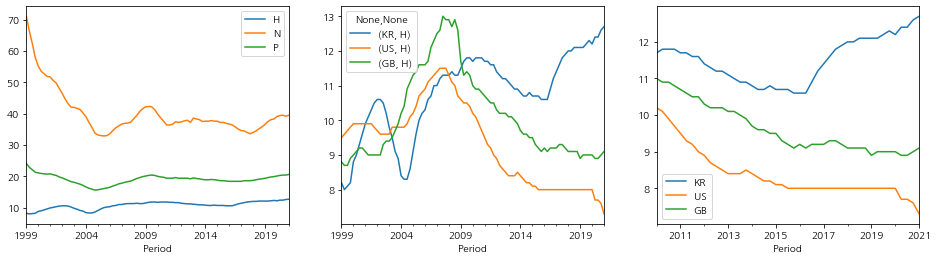

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))


df['KR'].plot(ax = ax[0])
df.loc[:, idx[['KR', 'US', 'GB'], 'H']].plot(ax = ax[1])
df.reorder_levels([1, 0], axis = 1)['H'].loc['2010':, ['KR', 'US', 'GB']].plot(ax = ax[2])

그래프 꾸미기
- python2021/script 폴더에서 RGB 값들이 리스트로 저장된 colors.py 파일 실행
    - lcolors, bcolors
- 색 지정, 범례, 그리드, 타이틀, 마커 등

In [ ]:
%run python2021/script/colors.py

<Figure size 432x288 with 0 Axes>

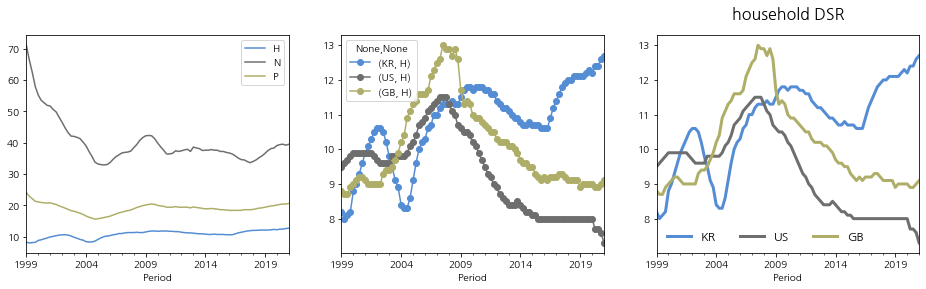

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))


df['KR'].plot(ax = ax[0], color=lcolors[:3])
df.loc[:, idx[['KR', 'US', 'GB'], 'H']].plot(ax = ax[1], color=lcolors[:3], marker='o')
df.reorder_levels([1, 0], axis = 1)['H'].loc[:, ['KR', 'US', 'GB']].plot(ax = ax[2], lw=3, color=lcolors[:3])

ax[2].legend(ncol=3, frameon=False, fontsize=12)
ax[2].set_title('household DSR', fontsize=16, y=1.05);

연도별 그래프 그리기

- 평균, 연말, moving average

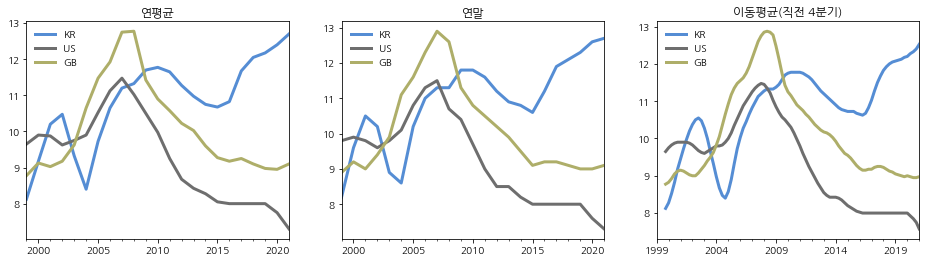

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

df_h = df.reorder_levels([1, 0], axis = 1)['H'].loc[:, ['KR', 'US', 'GB']]
df_h.index.names = [None]

df_h.resample('A').mean().plot(ax = ax[0], lw=3, color=lcolors[:3])
df_h.resample('A').last().plot(ax = ax[1], lw=3, color=lcolors[:3])
df_h.rolling(4, center=False).mean().plot(ax = ax[2], lw=3, color=lcolors[:3])

for i, t in enumerate(['연평균', '연말', '이동평균(직전 4분기)']):
    ax[i].set_title(t)
    ax[i].legend(frameon=False)


# 한국부동산원

- 웹페이지 https://www.reb.or.kr/r-one/main.do

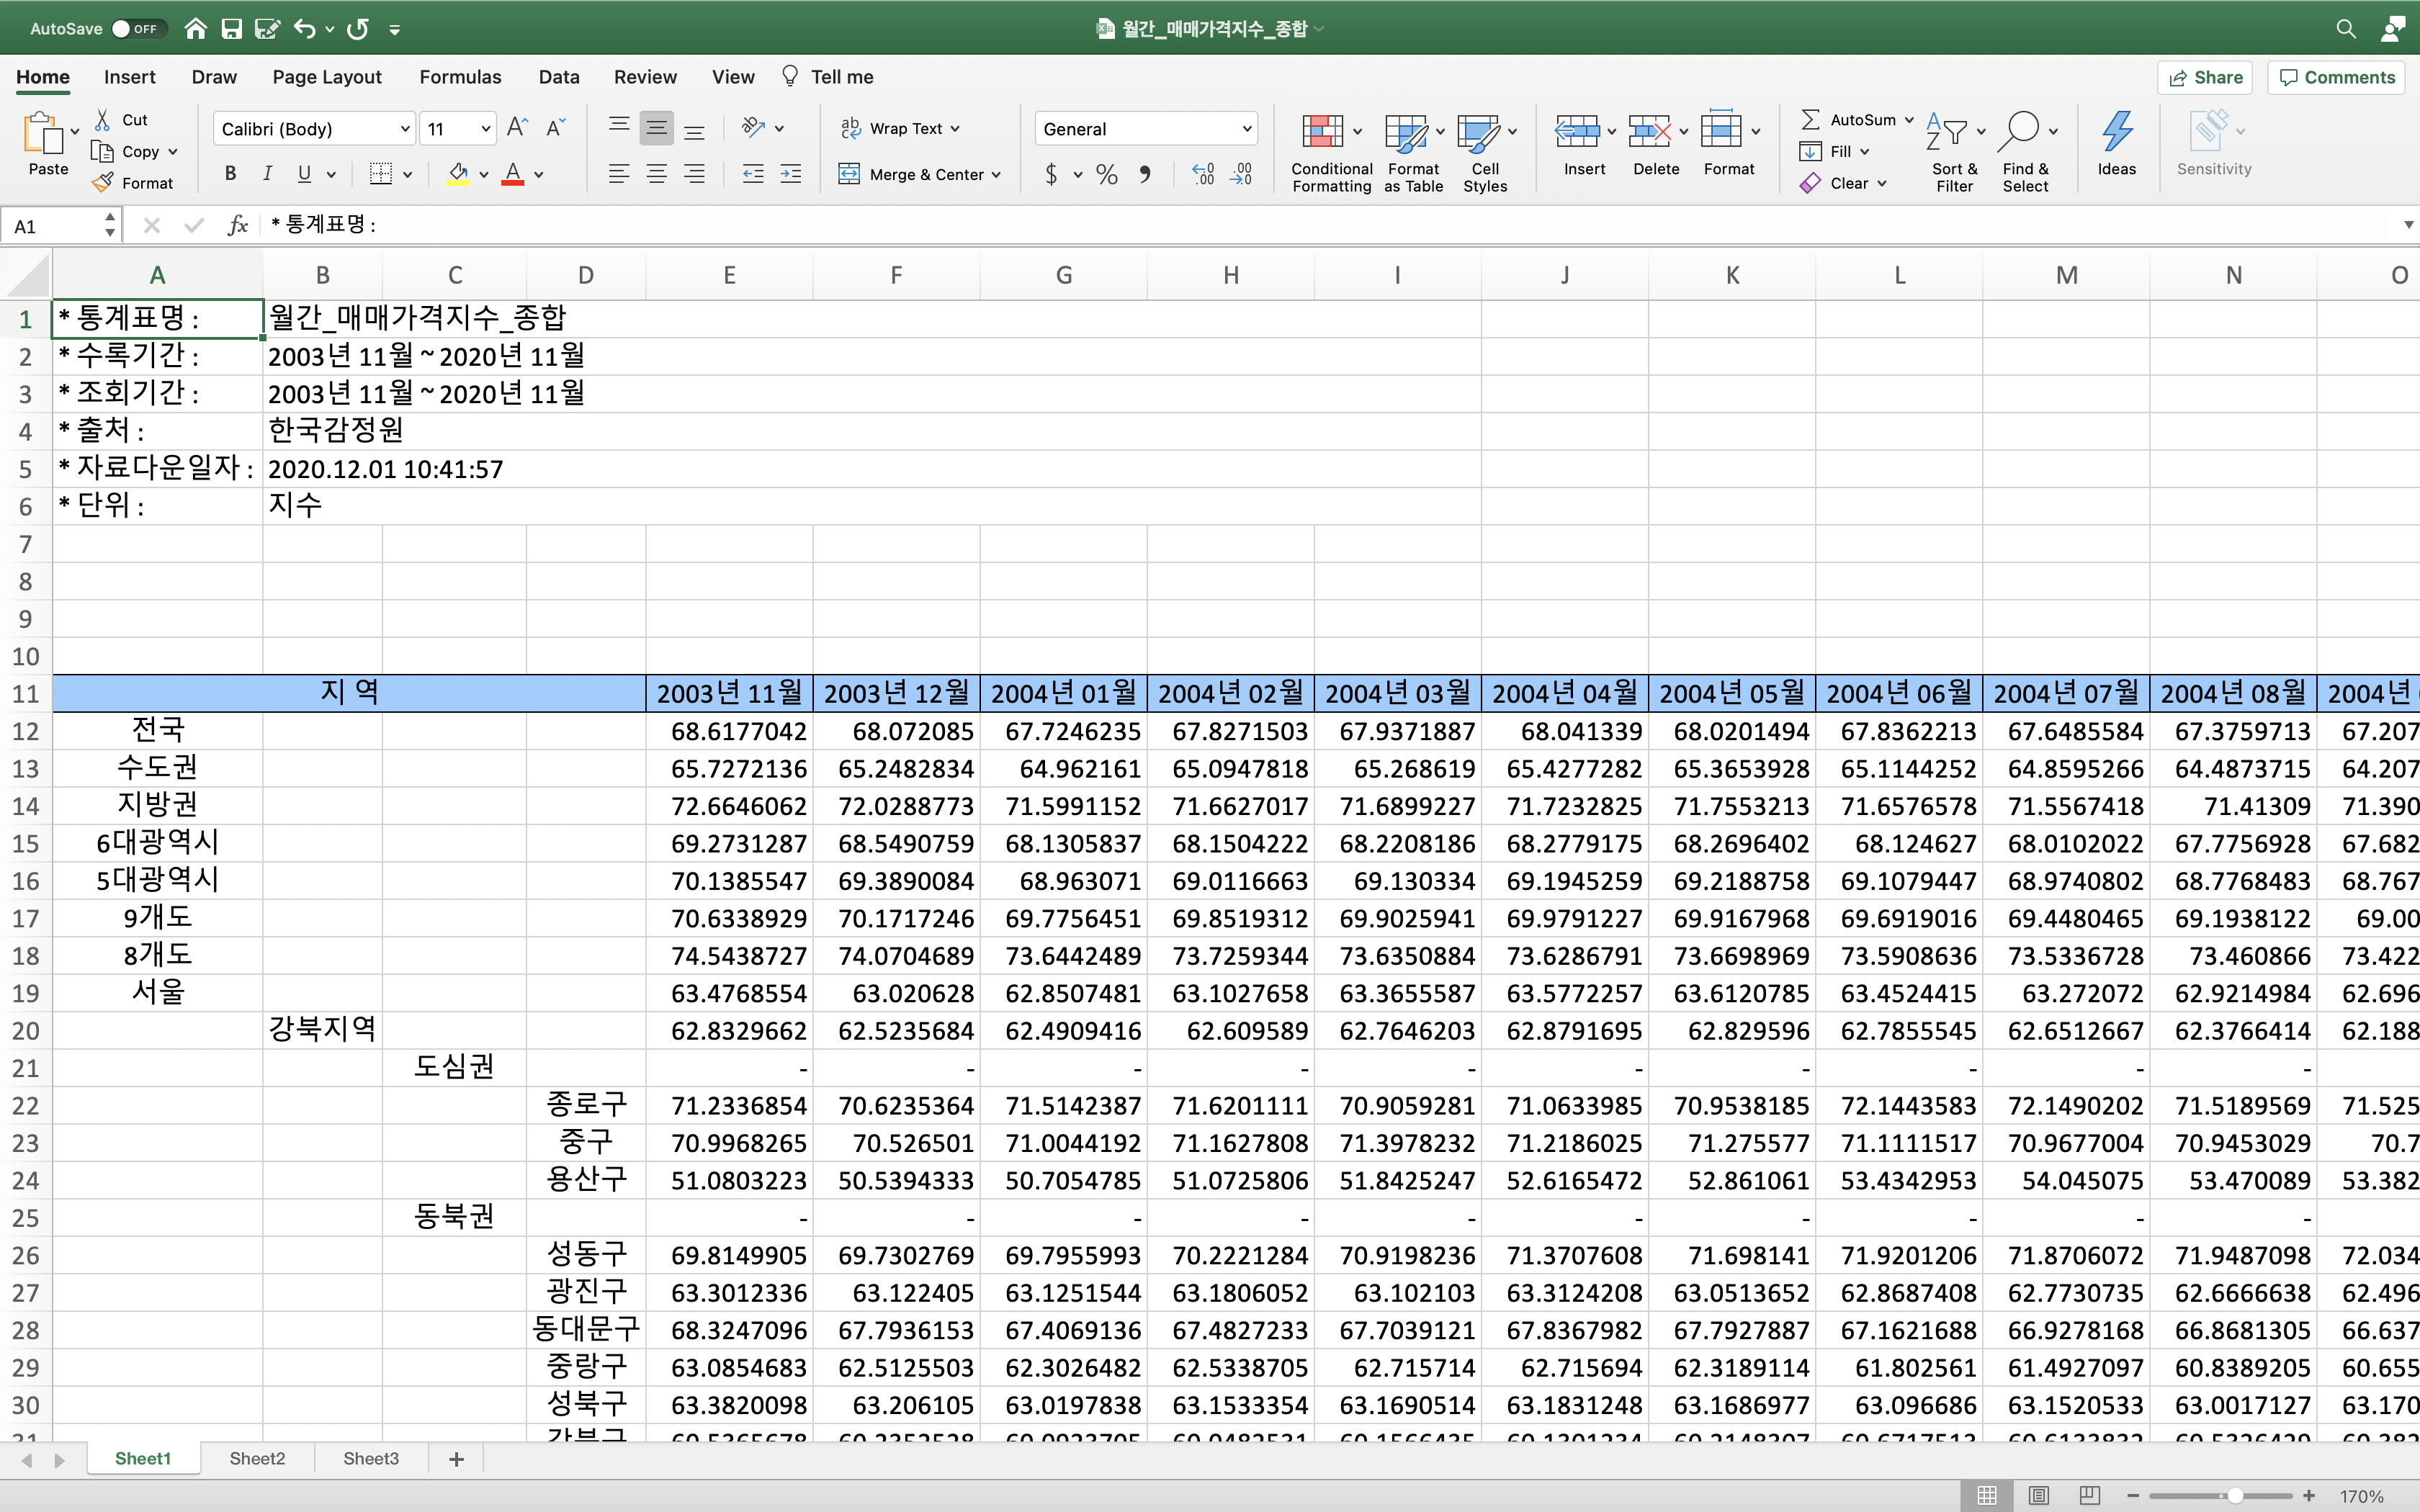

In [ ]:
from IPython.display import Image

Image('python2021/input/reb_xlsx.png', width=1000)

데이터 입수
- Sheet1 시트 입수
- 첫 10개 행 제외

In [ ]:
df = pd.read_excel('python2021/input/reb.xlsx', sheet_name='Sheet1', skiprows=10)

In [ ]:
df.head(15)

지 역 Unnamed: 1 Unnamed: 2  ... 2020년 09월 2020년 10월 2020년 11월
0      전국        NaN        NaN  ...    104.42   104.752   105.315
1     수도권        NaN        NaN  ...     109.2   109.524   110.064
2     지방권        NaN        NaN  ...   100.254   100.593   101.175
3   6대광역시        NaN        NaN  ...   104.705     105.2   106.122
4   5대광역시        NaN        NaN  ...   104.038   104.612   105.672
5     9개도        NaN        NaN  ...   102.105   102.391    102.89
6     8개도        NaN        NaN  ...   97.2363   97.4073   97.6891
7      서울        NaN        NaN  ...   110.419   110.597   110.782
8     NaN       강북지역        NaN  ...   110.092   110.317   110.546
9     NaN        NaN        도심권  ...   111.936   112.115   112.328
10    NaN        NaN        NaN  ...   109.177   109.371   109.589
11    NaN        NaN        NaN  ...   111.606   111.806   112.032
12    NaN        NaN        NaN  ...   113.908   114.068    114.27
13    NaN        NaN        동북권  ...    109.54   109.772   110.012
14    NaN        NaN        NaN  ...   113.179   113.387   113.595

[15 rows x 209 columns]

지역 이름 정리
- 전국, 수도권, 지방권, 6대광역시, 5대광역시, 9개도, 8개도, 서울, 서울-강북지역, 서울-도심권, 서울-종로구, ... 등
- '지역' 라벨을 아래 방향으로 채움 df.iloc[:, 0].fillna(method='ffill', axis=0)
- 첫 4개 칼럼의 NaN을 빈 문자열로 대체 df.iloc[:, 0:4].fillna('')
- 첫 4개 칼럼을 '-'으로 결함하여 새로운 칼럼 생성 df.iloc[:, 0:4].agg('-'.join, axis=1)
- '지역1-지역2' 유형 이외의 '-' 제거

In [ ]:
df.iloc[:, 0] = df.iloc[:, 0].fillna(method = 'ffill', axis = 0)

In [ ]:
df.iloc[:, 0:4] = df.iloc[:, 0:4].fillna('')

In [ ]:
df['R'] = df.iloc[:, 0:4].agg('-'.join, axis=1)

In [ ]:
df['R'] = df['R'].str.rstrip('-')

In [ ]:
df['R'] = df['R'].str.replace('---', '-').str.replace('--', '-')

In [ ]:
df['R'].unique()

array(['전국', '수도권', '지방권', '6대광역시', '5대광역시', '9개도', '8개도', '서울',
       '서울-강북지역', '서울-도심권', '서울-종로구', '서울-중구', '서울-용산구', '서울-동북권',
       '서울-성동구', '서울-광진구', '서울-동대문구', '서울-중랑구', '서울-성북구', '서울-강북구',
       '서울-도봉구', '서울-노원구', '서울-서북권', '서울-은평구', '서울-서대문구', '서울-마포구',
       '서울-강남지역', '서울-서남권', '서울-양천구', '서울-강서구', '서울-구로구', '서울-금천구',
       '서울-영등포구', '서울-동작구', '서울-관악구', '서울-동남권', '서울-서초구', '서울-강남구',
       '서울-송파구', '서울-강동구', '경기', '경기-경부1권', '경기-과천시', '경기-안양시', '경기-만안구',
       '경기-동안구', '경기-성남시', '경기-수정구', '경기-중원구', '경기-분당구', '경기-군포시',
       '경기-의왕시', '경기-경부2권', '경기-안성시', '경기-용인시', '경기-처인구', '경기-기흥구',
       '경기-수지구', '경기-수원시', '경기-장안구', '경기-권선구', '경기-팔달구', '경기-영통구',
       '경기-서해안권', '경기-부천시', '경기-안산시', '경기-상록구', '경기-단원구', '경기-시흥시',
       '경기-광명시', '경기-화성시', '경기-오산시', '경기-평택시', '경기-동부1권', '경기-남양주시',
       '경기-구리시', '경기-하남시', '경기-광주시', '경기-동부2권', '경기-이천시', '경기-여주시',
       '경기-경의권', '경기-김포시', '경기-고양시', '경기-덕양구', '경기-일산동구', '경기-일산서구',
       '경기-파주시', '경기-경원권', '경기-포천시', '경기-동두천시'

자주 사용하는 지역 리스트 만들기

In [ ]:
m6 = ['부산', '대구', '인천', '광주', '대전', '울산']
p8 = ['강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
sma = ['서울', '경기', '인천']
nsm = ['부산', '대구', '광주', '대전', '울산', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주', '세종']
a4 = ['전국', '수도권', '6대광역시', '8개도']

r17_long = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', 
            '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', 
            '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
r17_short = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산',
             '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
r17_en = ['GW', 'GG', 'GN', 'GB', 'GJ', 'DG', 'DJ', 'BS', 
          'SE', 'SJ', 'US', 'IC', 'JN', 'JB', 'JJ', 'CN', 'CB']
r17_long2short = dict(zip(r17_long, r17_short))
r17_kr2en = dict(zip(r17_short, r17_en))

새로운 지역 이름(R)을 인덱스로 지정하고 기존 지역 이름 칼럼 제거

In [ ]:
df = df.set_index('R')

In [ ]:
df = df.iloc[:, 4:]

칼럼 라벨을 데이트타임인덱스로 변환하고, 시간x변수명 구조를 갖도록 transpose
- '년 ' -> '-'
- '월' -> '' (빈문자열)
- df.columns = pd.to_datetime(df.columns)
- df = df.T

In [ ]:
df.head(1)

2003년 11월 2003년 12월 2004년 01월  ... 2020년 09월 2020년 10월 2020년 11월
R                                 ...                              
전국   68.6177   68.0721   67.7246  ...    104.42   104.752   105.315

[1 rows x 205 columns]

In [ ]:
df.columns = df.columns.str.replace('년 ', '-')

In [ ]:
df.columns = df.columns.str.replace('월', '')

In [ ]:
df.columns = pd.to_datetime(df.columns)

In [ ]:
df = df.T

데이터프레임 자료형이 정수나 실수인지 확인
- int, float
- str
- object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2003-11-01 to 2020-11-01
Columns: 228 entries, 전국 to 제주-서귀포시
dtypes: object(228)
memory usage: 366.8+ KB


In [ ]:
df.astype(float)

ValueError: ignored

null값인 '-' 문자열을 넘파이 빈값 np.nan으로 대체

In [ ]:
import numpy as np

df = df.replace('-', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2003-11-01 to 2020-11-01
Columns: 228 entries, 전국 to 제주-서귀포시
dtypes: float64(228)
memory usage: 366.8 KB


지역별 주택가격 추이
- 비수도권 광역시도 가격지수, 상승률
- 서울지역 가격지수
- 17개 광역시도중 지난 5년간 가격상승률이 가장 높은 지역 가격지수

In [ ]:
df17 = df[r17_short]
df17.pct_change(60).iloc[-1, :].nlargest(5)

R
세종    0.445484
대전    0.252583
서울    0.169143
경기    0.128578
전남    0.106237
Name: 2020-11-01 00:00:00, dtype: float64

In [ ]:
big5 = df17.pct_change(60).iloc[-1, :].nlargest(5).index

In [ ]:
big5

Index(['세종', '대전', '서울', '경기', '전남'], dtype='object', name='R')

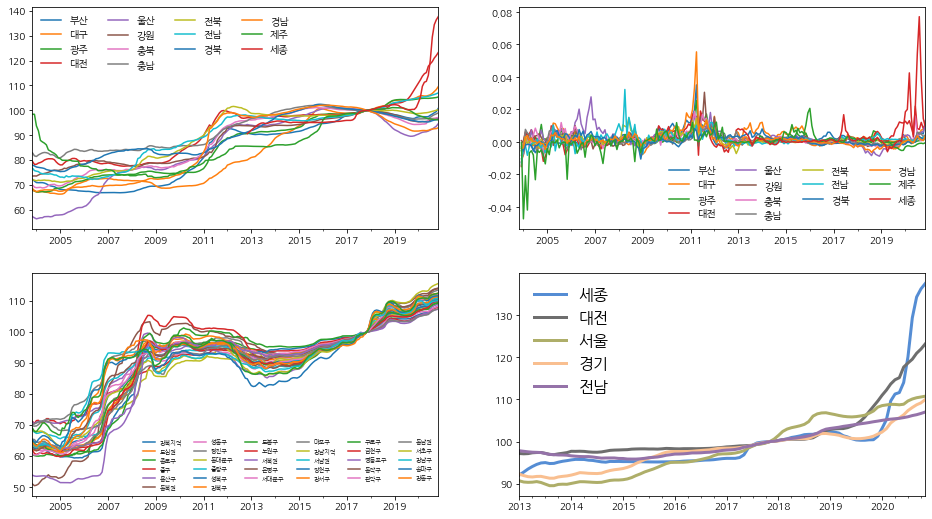

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 9))

df[nsm].plot(ax=ax[0, 0])
ax[0,0].legend(ncol=4, frameon=False)

df[nsm].pct_change().plot(ax=ax[0, 1])
ax[0,1].legend(ncol=4, frameon=False)

df.filter(like='서울').plot(ax=ax[1, 0])
seoul = df.filter(like='서울-').columns
legend = [j for i,j in seoul.str.split('-').tolist()]
ax[1,0].legend(legend, ncol=6, frameon=False, fontsize=6)

df.loc['2013':, big5].plot(ax=ax[1, 1], lw=3, color=lcolors)
ax[1,1].legend(ncol=1, frameon=False, fontsize=16)

# ECOS open API
- https://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp
- 회원가입 후, '서비스 이용 - 인증키 신청'
- '개발 가이드 - 언어별 개발 가이드 - 파이썬' 참고
- '개발 가이드 - 통계코드검색'에서 원하는 통계항목의 코드 검색

10.국민계정(2015년 기준년) - 10.1.1.연간지표 - 국내총생산(명목,원화표시)

- 인증키를 이용하여 2010년부터 2100년까지, 10,000개 이내 자료를 국문 json 파일 형식으로 입수하기 위한 url 주소 생성

In [ ]:
url = 'http://ecos.bok.or.kr/api/StatisticSearch/390S6FIOF95M7MHASMEA/json/kr/1/10000/111Y002/YY/2010/2100/10101/?/?/'

In [ ]:
import json
from urllib.request import urlopen

result = urlopen(url)
data = json.loads(result.read())

In [ ]:
data

{'StatisticSearch': {'list_total_count': 11,
  'row': [{'DATA_VALUE': '1322611.2',
    'ITEM_CODE1': '10101',
    'ITEM_CODE2': ' ',
    'ITEM_CODE3': ' ',
    'ITEM_NAME1': '국내총생산(명목, 원화표시)',
    'ITEM_NAME2': ' ',
    'ITEM_NAME3': ' ',
    'STAT_CODE': '111Y002',
    'STAT_NAME': '10.1.1. 연간지표',
    'TIME': '2010',
    'UNIT_NAME': '십억원 '},
   {'DATA_VALUE': '1388937.2',
    'ITEM_CODE1': '10101',
    'ITEM_CODE2': ' ',
    'ITEM_CODE3': ' ',
    'ITEM_NAME1': '국내총생산(명목, 원화표시)',
    'ITEM_NAME2': ' ',
    'ITEM_NAME3': ' ',
    'STAT_CODE': '111Y002',
    'STAT_NAME': '10.1.1. 연간지표',
    'TIME': '2011',
    'UNIT_NAME': '십억원 '},
   {'DATA_VALUE': '1440111.4',
    'ITEM_CODE1': '10101',
    'ITEM_CODE2': ' ',
    'ITEM_CODE3': ' ',
    'ITEM_NAME1': '국내총생산(명목, 원화표시)',
    'ITEM_NAME2': ' ',
    'ITEM_NAME3': ' ',
    'STAT_CODE': '111Y002',
    'STAT_NAME': '10.1.1. 연간지표',
    'TIME': '2012',
    'UNIT_NAME': '십억원 '},
   {'DATA_VALUE': '1500819.1',
    'ITEM_CODE1': '10101',
    'ITE

In [ ]:
type(data)

dict

In [ ]:
data.keys()

dict_keys(['StatisticSearch'])

In [ ]:
data = data['StatisticSearch']

In [ ]:
data.keys()

dict_keys(['list_total_count', 'row'])

In [ ]:
data['list_total_count']

11

In [ ]:
data['row']

[{'DATA_VALUE': '1322611.2',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_CODE': '111Y002',
  'STAT_NAME': '10.1.1. 연간지표',
  'TIME': '2010',
  'UNIT_NAME': '십억원 '},
 {'DATA_VALUE': '1388937.2',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_CODE': '111Y002',
  'STAT_NAME': '10.1.1. 연간지표',
  'TIME': '2011',
  'UNIT_NAME': '십억원 '},
 {'DATA_VALUE': '1440111.4',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_CODE': '111Y002',
  'STAT_NAME': '10.1.1. 연간지표',
  'TIME': '2012',
  'UNIT_NAME': '십억원 '},
 {'DATA_VALUE': '1500819.1',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_COD

In [ ]:
data = data['row']

In [ ]:
data  # 데이터의 각 행이 열 이름과 값의 딕셔너리 형태로 정리되어 있음

[{'DATA_VALUE': '1322611.2',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_CODE': '111Y002',
  'STAT_NAME': '10.1.1. 연간지표',
  'TIME': '2010',
  'UNIT_NAME': '십억원 '},
 {'DATA_VALUE': '1388937.2',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_CODE': '111Y002',
  'STAT_NAME': '10.1.1. 연간지표',
  'TIME': '2011',
  'UNIT_NAME': '십억원 '},
 {'DATA_VALUE': '1440111.4',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_CODE': '111Y002',
  'STAT_NAME': '10.1.1. 연간지표',
  'TIME': '2012',
  'UNIT_NAME': '십억원 '},
 {'DATA_VALUE': '1500819.1',
  'ITEM_CODE1': '10101',
  'ITEM_CODE2': ' ',
  'ITEM_CODE3': ' ',
  'ITEM_NAME1': '국내총생산(명목, 원화표시)',
  'ITEM_NAME2': ' ',
  'ITEM_NAME3': ' ',
  'STAT_COD

딕셔너리 데이터를 이용하여 판다스 데이터프레임 생성

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
df

UNIT_NAME     STAT_NAME ITEM_CODE1  ... DATA_VALUE ITEM_NAME3  TIME
0       십억원   10.1.1. 연간지표      10101  ...  1322611.2             2010
1       십억원   10.1.1. 연간지표      10101  ...  1388937.2             2011
2       십억원   10.1.1. 연간지표      10101  ...  1440111.4             2012
3       십억원   10.1.1. 연간지표      10101  ...  1500819.1             2013
4       십억원   10.1.1. 연간지표      10101  ...  1562928.9             2014
5       십억원   10.1.1. 연간지표      10101  ...  1658020.4             2015
6       십억원   10.1.1. 연간지표      10101  ...  1740779.6             2016
7       십억원   10.1.1. 연간지표      10101  ...  1835698.2             2017
8       십억원   10.1.1. 연간지표      10101  ...  1898192.6             2018
9       십억원   10.1.1. 연간지표      10101  ...  1924498.1             2019
10      십억원   10.1.1. 연간지표      10101  ...  1933152.4             2020

[11 rows x 11 columns]

In [ ]:
from pandas.tseries.offsets import YearEnd, QuarterEnd, MonthEnd, YearBegin, QuarterBegin, MonthBegin


def ecos(code = '111Y002', item1 = '10101', item2 = '?', item3 = '?', 
         freq = 'QQ', first = '1900', last = '2100', N = '10000', 
         detail = True, col = None):
    
    '''retreive monthly, quarterly, annul time series from ecos.
    run 'open_ecosapi() to explore ecos api codes.'''
    ecos_key = "http://ecos.bok.or.kr/api/StatisticSearch/390S6FIOF95M7MHASMEA"
    
    url  = f"{ecos_key}/json/kr/1/{N}/{code}/{freq}/{first}/{last}/{item1}/{item2}/{item3}/"
    result = urlopen(url)
    data = json.loads(result.read())
    data = data["StatisticSearch"]["row"]
    df = pd.DataFrame(data)
    
    if detail:
        print(f"통계: {df.loc[0, 'STAT_NAME']}",
              f"단위: {df.loc[0, 'UNIT_NAME']}",
              f"기간: {df.loc[0, 'TIME']} - {df.loc[df.index[-1], 'TIME']}",
              f"항목: {df.loc[0, 'ITEM_NAME1']}",)
    
    df = df.set_index("TIME")
    df.index.names = ['DATE']
    freq_str = {'QQ': 'Q', 'MM': '-'}
    
    if (freq == 'MM'):
        df.index = pd.DatetimeIndex(df.index.str[:4] + freq_str[freq] + df.index.str[4:])
        df.index = df.index + MonthEnd()
    elif (freq == 'QQ'):
        df.index = pd.DatetimeIndex(df.index.str[:4] + freq_str[freq] + df.index.str[4:])
        df.index = df.index + QuarterEnd()
    elif (freq == 'YY'):
        df.index = pd.DatetimeIndex(df.index)
        df.index = df.index + YearEnd()
    elif (freq == 'DD'):
        df.index = pd.DatetimeIndex(df.index)
    else:
        print('frequency is not one of D, M, Q, A.')
        return
    
    df["DATA_VALUE"] = df["DATA_VALUE"].astype("float")
    
    return df['DATA_VALUE'].to_frame(col)

In [ ]:
gdp = ecos('111Y012', '110301', freq='QQ', col = 'gdp')

통계: 10.2.1.1. 경제활동별 GDP 및 GNI(계절조정, 명목, 분기) 단위: 십억원  기간: 19701 - 20212 항목: 음식료품 제조업


In [ ]:
man = ecos('111Y010', '1103', freq='QQ', col = 'man')

통계: 10.2.1.3. 경제활동별 GDP 및 GNI(원계열, 명목, 분기 및 연간) 단위: 십억원  기간: 19601 - 20212 항목: 제조업


In [ ]:
cpi = ecos('021Y125', '0', freq = 'MM', col = 'cpi')

통계: 7.4.1 소비자물가지수(2015=100)(전국) 단위: 2015=100 기간: 196501 - 202110 항목: 총지수


In [ ]:
irate = ecos('060Y001', '010101000', freq = 'DD', col = 'irate')

통계: 4.1.1 시장금리(일별) 단위: 연% 기간: 19950103 - 20211117 항목: 콜금리(1일, 전체거래)


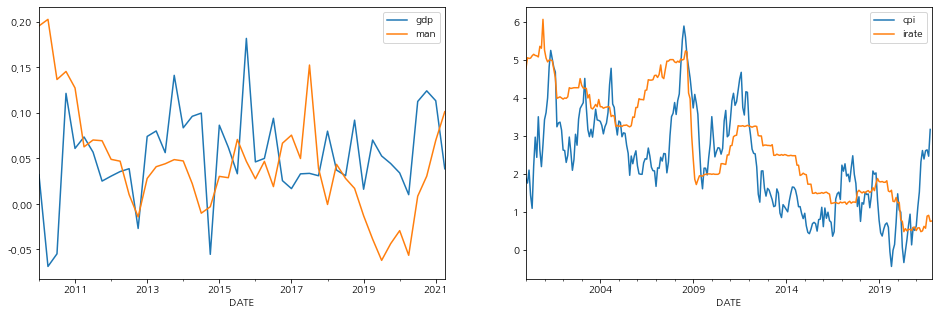

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

gdp.pct_change(4).loc['2010':].plot(ax=ax[0])
man.pct_change(4).loc['2010':].plot(ax=ax[0])

(cpi.pct_change(12) * 100).loc['2000':].plot(ax=ax[1])
irate.resample('M').last().loc['2000':].plot(ax=ax[1])

<a id='credit_gap'></a>

# 신용갭

- 민간신용/GDP 비율
- HP 필터

In [ ]:
df = pd.DataFrame()
for b, bn in zip(['D4000', 'D5000'], ['cc', 'hc']):
    for a, an in zip(['4040000', '4050000', '4060000'], ['채권', '대출', '정부융자']):
        try:
            df0 = ecos('012Y502', a, 'L', b, 'QQ', detail=False, col=bn + ':' + an)
            df = pd.concat([df, df0], axis = 1)
        except:
            continue

df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())
ff2008 = df.groupby(level = 0, axis = 1).sum()

### 자금순환 2002Q4~
df = pd.DataFrame()
for b, bn in zip(['C3000', 'C4000'], ['cc', 'hc']):
    for a, an in zip(['304000', '305000', '306000'], ['채권', '대출', '정부융자']):
        try:
            df0 = ecos('012Y102', a, 'L', b, 'QQ', detail=False, col=bn + ':' + an)
            df = pd.concat([df, df0], axis = 1)
        except:
            continue

df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())
ff2002 = df.groupby(level = 0, axis = 1).sum()


### 자금순환 1975~
df = pd.DataFrame()
for b, bn in zip(['C220', 'C290'], ['cc', 'hc']):
    for a, an in zip(['205000', '206000', '208000', '209000'],
                     ['단기채권', '장기채권', '대출', '정부융자']):
        try:
            df0 = ecos('012Y002', a, '2', b, 'QQ', detail=False, col=bn + ':' + an)
            df = pd.concat([df, df0], axis = 1)
        except:
            continue

df.columns = pd.MultiIndex.from_tuples(df.columns.str.split(':').tolist())
ff1975 = df.groupby(level = 0, axis = 1).sum()

adj_0208 = ff2008.sum(axis=1).loc['2008-12-31'] / ff2002.sum(axis=1).loc['2008-12-31']
adj_7502 = adj_0208 * ff2002.sum(axis=1).loc['2002-12-31'] / ff1975.sum(axis=1).loc['2002-12-31']

ff = pd.concat([ff1975.loc[:'2002Q3'] * adj_7502, ff2002.loc['2002Q4':'2008Q3'] * adj_0208, ff2008], axis=0)
ff['tc'] = ff.sum(axis=1)

명목GDP

In [ ]:
# 통계명: 10.2.2.1 국내총생산에 대한 지출(계절조정, 명목, 분기) 
ngdp = ecos('111Y014', '10601', 'QQ', col = 'ngdp')

통계: 10.2.2.3. 국내총생산에 대한 지출(원계열, 명목, 분기 및 연간) 단위: 십억원  기간: 19601 - 20212 항목: 국내총생산에 대한 지출


In [ ]:
gdp_ma = ngdp.rolling(12, center=False).mean() * 4

민간신용/명목GDP

In [ ]:
credit_gdp = ff.loc['1978':].div(gdp_ma.loc['1978':, 'ngdp'], axis = 0)

In [ ]:
%run python2021/script/plots.py

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

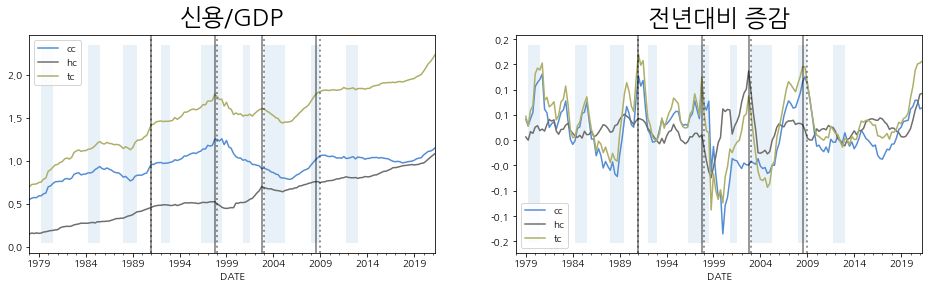

In [ ]:
%run python2021/script/colors.py

from matplotlib import ticker

fig, ax = plt.subplots(1, 2, figsize=[16, 4])

credit_gdp.rolling(1, center=True).mean().plot(ax=ax[0], color=lcolors[:3])
credit_gdp.diff(4).rolling(1, center=False).mean().plot(ax=ax[1], color=lcolors[:3])

# for a in ax.ravel():
#     a.axhline(y=0.0, color='k', linestyle='-', alpha=0.5)
    
plot_crisis(ax, ['1978-3-31', '2020-9-30'])
plot_rec(ax, ['1978-3-31', '2020-9-30'])

for i, t in enumerate(['신용/GDP', '전년대비 증감']):
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.1f}"))
    ax[i].set_title(t, fontsize=24, y=1.02)

plt.show()

In [ ]:
gdp_ma = ngdp.rolling(4, center=False).mean() * 4
credit_gdp = ff.loc['1978':].div(gdp_ma.loc['1978':, 'ngdp'], axis = 0)

fr_cycle, fr_trend = one_sided_hpfilter(credit_gdp.dropna(), 25000)   # 금융안정보고서 신용갭, 트렌드

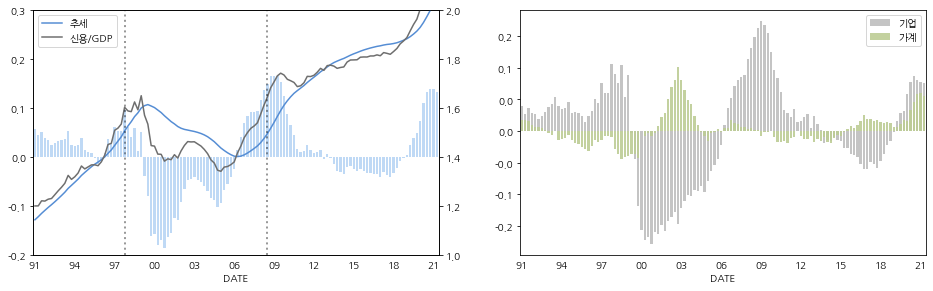

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=[16, 5])

fr_cycle.loc['1991':, 'tc'].plot.bar(color=bcolors[0], width=0.7, alpha=0.9, ax=ax[0])

ticklabels = [''] * len(fr_cycle.loc['1991':, 'tc'].index)
ticklabels[::12] = [item.strftime('%y') for item in fr_cycle.loc['1991':, 'tc'].index[::12]]

ax[0].xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax[0].xaxis.set_ticks_position('none')
ax[0].set_ylim(-0.2, 0.3)

axb = ax[0].twinx()
axb.plot(ax[0].get_xticks(), fr_trend.loc['1991':, 'tc'], label='추세', c=lcolors[0])
axb.plot(ax[0].get_xticks(), credit_gdp.loc['1991':, 'tc'], label='신용/GDP', c=lcolors[1])
axb.axvline(x=fr_trend.loc['1991':, 'tc'].index.get_loc('1997-12-31'), 
            color='k', linestyle=':', lw=2, alpha=0.4) 
axb.axvline(x=fr_trend.loc['1991':, 'tc'].index.get_loc('2008-09-30'), 
            color='k', linestyle=':', lw=2, alpha=0.4) 
axb.legend()
axb.set_ylim(1, 2)
for a in ax:
    a.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.1f}"))

fr_cycle.loc['1991':, 'cc'].plot.bar(color=bcolors[1], width=0.7, alpha=0.9, ax=ax[1], label='기업')
fr_cycle.loc['1991':, 'hc'].plot.bar(color=bcolors[2], width=0.7, alpha=0.9, ax=ax[1], label='가계')
ax[1].xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax[1].xaxis.set_ticks_position('none')
ax[1].legend()

ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{x:,.1f}"))

fig.autofmt_xdate(rotation=0, ha='center')